# Rayleigh Distribution

Dustin D. Gerrard

This notebook describes the Rayleigh distribution. This distribution describes the time between events in a Poisson Point Process, "i.e., a process in which events occur continuously and independently at a constant average rate."
<br>
<br>
https://en.wikipedia.org/wiki/Rayleigh_distribution
<br>
<br>
Examples:
* The lifetime of a component that depends on age (resistor, capacitor, etc.).
* Wind speed, wave height.
* The Rayleigh distribution is a Chi distribution for k=2.

\begin{equation*}
\Large
f(t; \sigma) = \frac{x}{\sigma^2}e^{-x^2/(2\sigma^2)}
\end{equation*}

In [1]:
from IPython.core.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/6/61/Rayleigh_distributionPDF.svg', width=560, height=560) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh
from scipy.special import erf, erfinv

# Rayleigh Distribution using scipy

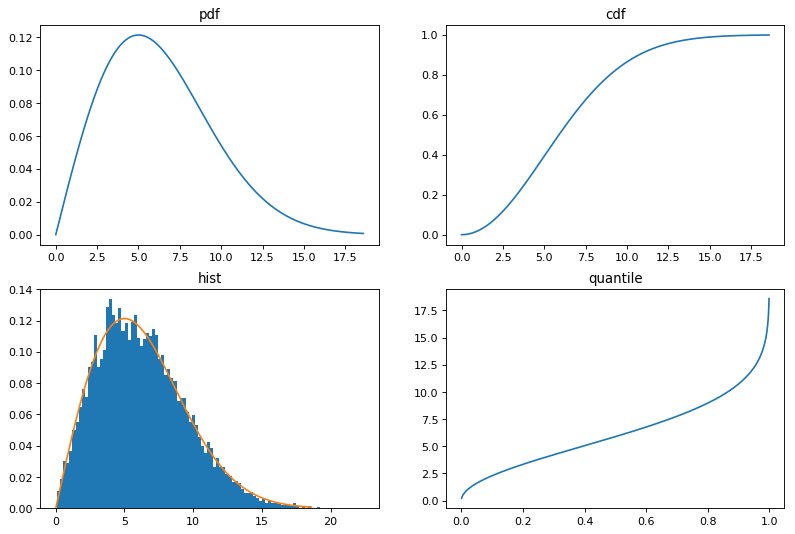

In [3]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html
sigma = 5
x = np.linspace(rayleigh.ppf(1e-14, 0, sigma), rayleigh.ppf(0.999, 0, sigma), 1000) # ppf = percent point function
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.plot(x, rayleigh.pdf(x, 0, sigma)) # pdf = probability distribution function
plt.title('pdf')
plt.subplot(222)
plt.plot(x, rayleigh.cdf(x, 0, sigma)) # cdf = cumumlative distribution function
plt.title('cdf')
plt.subplot(223)
r = rayleigh.rvs(0, sigma, size=10000) # rvs = random variates
plt.hist(r, 100, density=True)
plt.plot(x, rayleigh.pdf(x, 0, sigma))
plt.title('hist')
r = rayleigh.rvs(0, sigma, size=100000)
plt.subplot(224)
q = np.linspace(0.001, 0.999, 1000)
plt.plot(q, rayleigh.ppf(q, 0, sigma))
plt.title('quantile')
plt.show()

In [4]:
mean, var, skew, kurt = rayleigh.stats(sigma, moments='mvsk')
median = rayleigh.median(loc=0, scale=sigma)

# Rayleigh Distribution explicitly in Python

In [5]:
def rayleighDist(sigma):
    Xs = np.linspace(0, 10*sigma, 101)
    Ys = Xs/pow(sigma,2)*np.exp(-pow(Xs,2)/(2*pow(sigma,2)))
    CDFs = 1 - np.exp(-pow(Xs,2)/(2*pow(sigma,2)))
    return Xs, Ys, CDFs

### pdf - probability distribution function

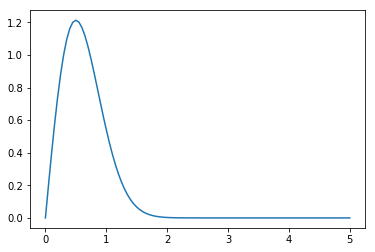

In [6]:
sigma = 0.5 # mean and standard deviation
Xs, Ys, CDFs = rayleighDist(sigma)
plt.plot(Xs,Ys)
plt.show()

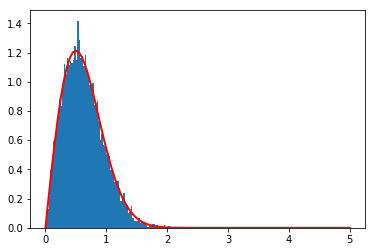

In [7]:
A = np.random.rayleigh(sigma, 10000)
fig, ax1 = plt.subplots()
plt.hist(A, 100, density=True)
plt.plot(Xs, Ys, linewidth=2, color='r')
plt.show()

### cdf - cumulative distribution function

In [8]:
sigma = 2 # mean and standard deviation
Xs, Ys, CDFs = rayleighDist(sigma)
sigma2 = 5
Xs2, Ys2, CDFs2 = rayleighDist(sigma2)

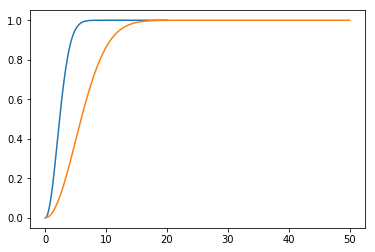

In [9]:
plt.plot(Xs,CDFs)
plt.plot(Xs2,CDFs2)
plt.show()

### Quantile

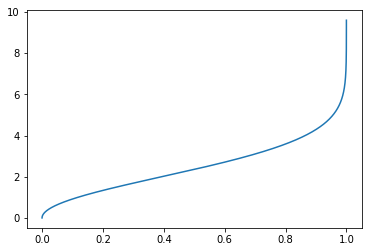

In [10]:
lambda0 = 2
Fs = np.linspace(0,1,100001)
Qs = sigma*np.sqrt(-2*np.log(1-Fs))
plt.plot(Fs,Qs)
plt.show()

# Example

Absolute wind speed is analysed as a vector sum of two orthogonal components that each have constituent speed $\mu$ and standard deviation $\sigma$. This forms a Rayleigh distribution.

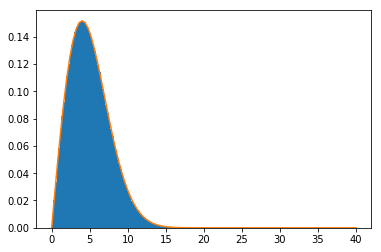

In [11]:
mu = 0
sigma =  4
num_samples = 10000000
W = np.sqrt(pow(np.random.normal(mu, sigma, num_samples), 2) + pow(np.random.normal(mu, sigma, num_samples), 2))
Xs, Ys, CDFs = rayleighDist(sigma)
plt.hist(W, 100, density=True)
plt.plot(Xs, Ys)
plt.show()